# Visualization With Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Contour 

In [2]:
import numpy as np
X = np.linspace(0,5,50)
Y = np.linspace(0,5,40)

In [3]:
X,Y = np.meshgrid(X,Y)
def fun(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
Z = fun(X,Y)

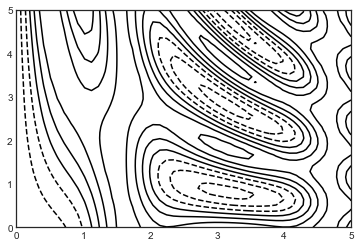

In [4]:
fig,ax = plt.subplots()
ax.contour(X,Y,Z,colors = 'black') # 注意colors 参数
plt.show()

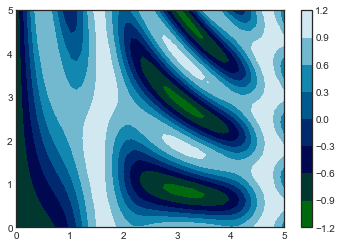

In [5]:
# fig, ax2 = plt.subplots()
# plt.contourf(X,Y,Z,cmap = 'RdGy')
plt.contourf(X,Y,Z,cmap = 'ocean')
plt.colorbar()
plt.show()

## Histgrams, Binnings and Density

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


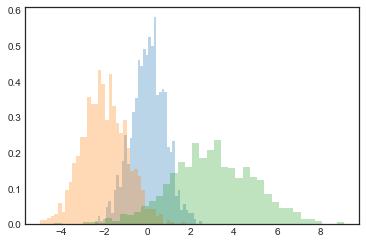

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
# kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

In [7]:
# 参数查看方法
data = np.random.randn(1000)
counts, bin_edges = np.histogram(data,bins =5)
counts, bin_edges

(array([ 41, 329, 472, 152,   6], dtype=int64),
 array([-3.0581943 , -1.71099951, -0.36380471,  0.98339009,  2.33058489,
         3.67777968]))

In [8]:
# 二维histgrams
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,1000).T

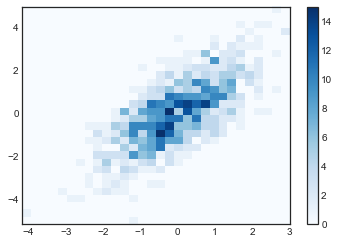

In [9]:
plt.hist2d(x,y,bins= 30,cmap = 'Blues')
plt.colorbar()
plt.show()

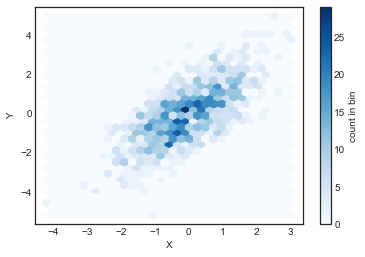

In [10]:
# 更自然的六边形镶嵌形式
plt.hexbin(x,y,gridsize = 30,bins = 30,cmap = 'Blues')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label = 'count in bin')
plt.show()

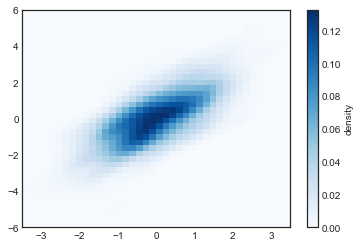

In [11]:
# 估计样本分布的KDE方法
from scipy.stats import  gaussian_kde
data = np.vstack([x,y])
kde = gaussian_kde(data)

# 估计一张网格
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

# evaluate on a regular grid
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),origin='lower', aspect='auto',extent=[-3.5, 3.5, -6, 6],cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")
plt.show()

## Cutomizing Legends
自定义图例

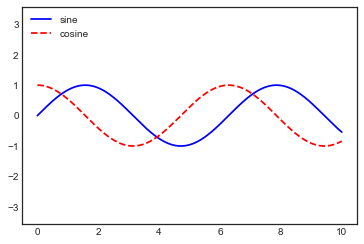

In [12]:
x = np.linspace(0,10,1000)
y = np.linspace(0,10,1000)
fig ,ax = plt.subplots()
plt.style.use('seaborn')
ax.plot(x,np.sin(x),'-b',label = 'sine')
ax.plot(y,np.cos(y),'--r',label = 'cosine')
ax.axis('equal')
ax.legend(loc = 'upper left',frameon = False)
plt.show()

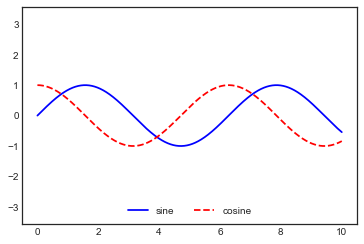

In [13]:
# 指定行数
ax.legend(loc=  'lower center',ncol = 2,frameon = False)
fig

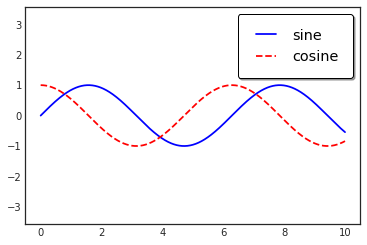

In [14]:
# 制定box
plt.style.use('classic')
ax.legend(fancybox = True,framealpha = 1, shadow = True, borderpad= 1)
fig

D:\Anaconda\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


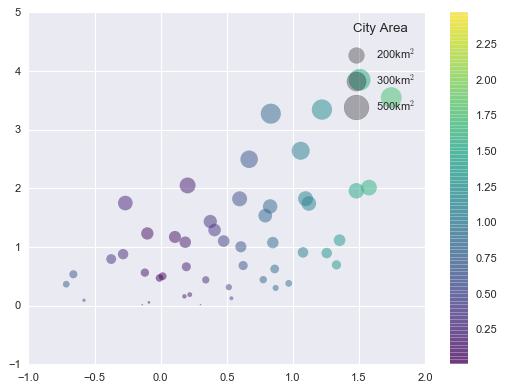

In [15]:
# Legend For Size of Points
mean = [0,0]
cov = [[1,1],[1,2]]
plt.style.use('seaborn')
x,y = np.random.multivariate_normal(mean,cov,100).T
plt.scatter(x,y,s = y*100,c=np.abs(x),cmap='viridis', linewidth=0, alpha=0.5)
plt.colorbar()

for size in [200,300,500]:
    plt.scatter([],[],s= size,c = 'k',alpha = 0.3, label= str(size) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='City Area')

plt.show()

## Customizing Colorbars

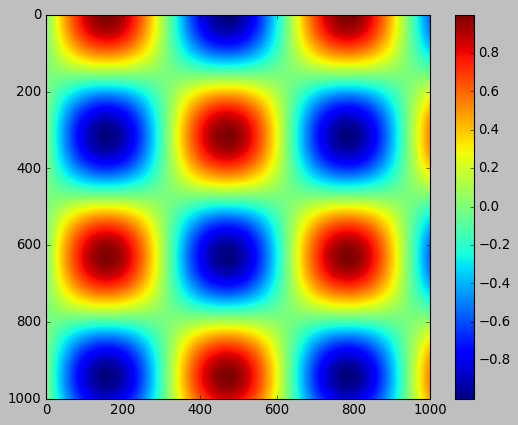

In [16]:
x = np.linspace(0,10,1000)
I = np.sin(x) * np.cos(x[:,np.newaxis])
# I.shape
# np.sin(x).shape, x[:,np.newaxis].shape
plt.style.use('classic')
plt.imshow(I)
plt.colorbar()
plt.show()

**在这里插一句题外话，突然发现了不得了的东西：(1000,)× (1000,1) -->(1000,1000) .....**

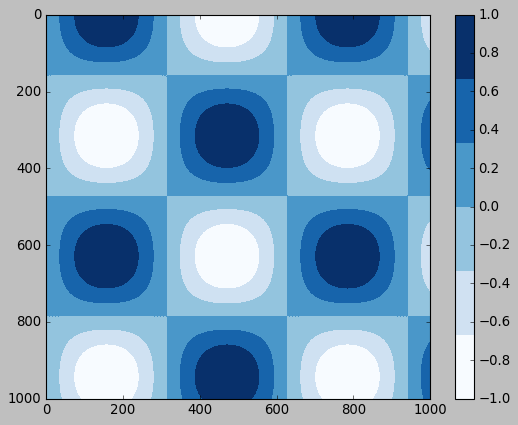

In [17]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6)) # 离散的颜色值，分为6段；如果不定义的话则是连续的颜色值
# plt.imshow(I,cmap = 'Blues')
plt.colorbar()
plt.clim(-1, 1);
plt.show()

## ColorBar Applyinng Example: Digital Numbers

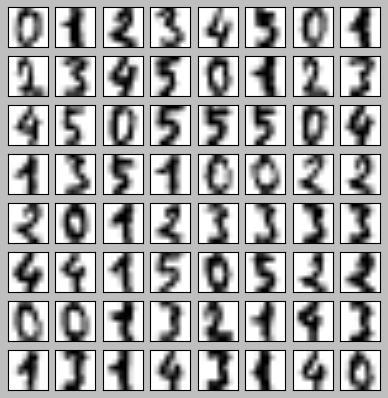

In [18]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)

fig, ax = plt.subplots(8,8,figsize = (6,6))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap = 'binary')
    axi.set(xticks = [],yticks = [])
plt.show()

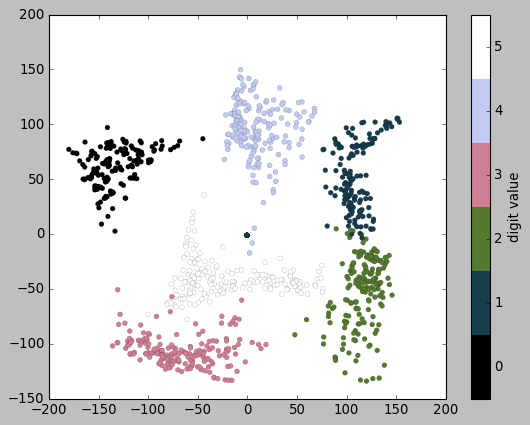

In [19]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)
plt.show()

## Multiple subplots

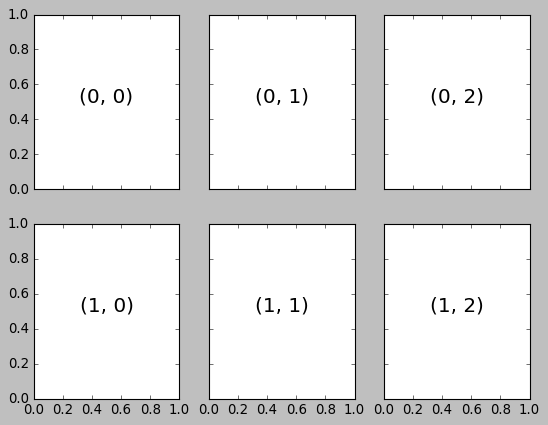

In [20]:
# 这部分不多讲，列几个不熟悉的
# sharex 和 sharey参数
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') 
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize= 18,ha = 'center')
plt.show()

## Cutomizing Ticks 
再次回顾matplotlib的层级关系：figure --> axes -->axis

We can customize these tick properties—that is, locations and labels—by setting the
formatter and locator objects of each axis.

如果想隐藏ticks 可以使用ax.xaxis.set_major_locator(plt.NullLocator())

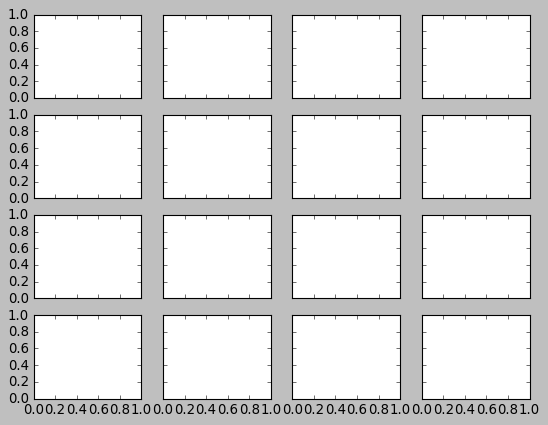

In [21]:
# Reducing or Increasing the Number of Ticks
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
fig
# 这是正常的默认图，可以看到tick太过于密集

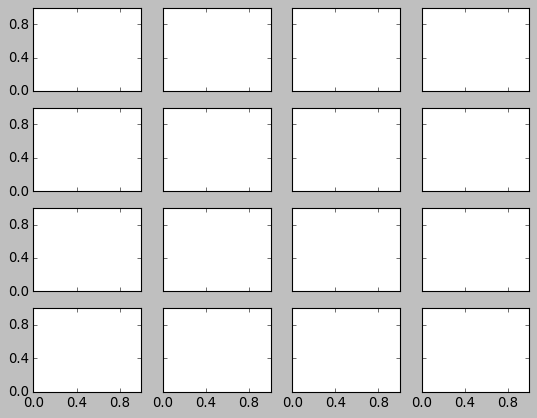

In [22]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
plt.show()

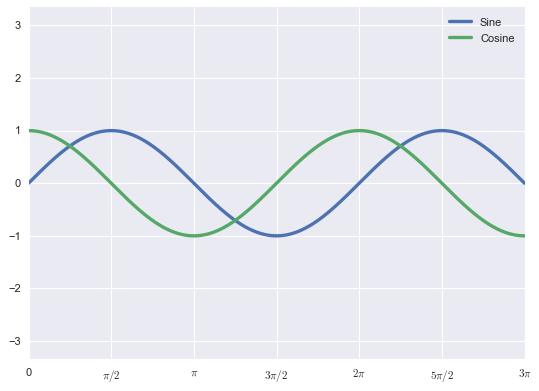

In [30]:
# Fancy Formatter
# Plot a sine and cosine curve
fig, ax = plt.subplots()
plt.style.use('seaborn')
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

# 转移坐标位置到Pi
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

# 自定义tick格式
def format_fun(value,tick_number):
    N = int(np.round(2*value / np.pi))
    if N ==0:
        return '0'
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_fun))
plt.show()

## Three-Dimentional Plotting in Matplotlib

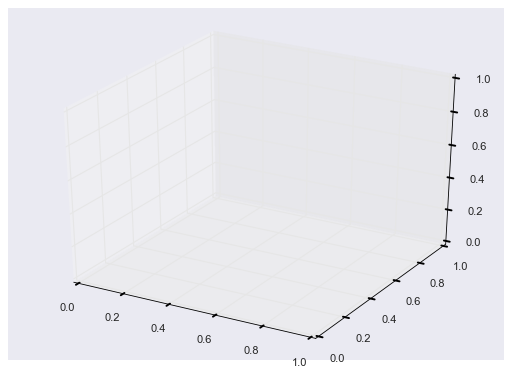

In [34]:
from mpl_toolkits import  mplot3d
fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.show()

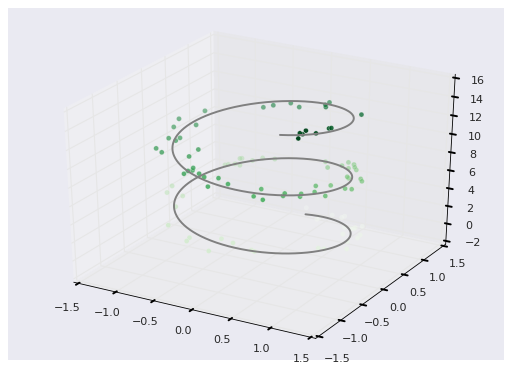

In [38]:
# Data for a three-dimensional line
ax = plt.axes(projection = '3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.style.use('classic')
plt.show()

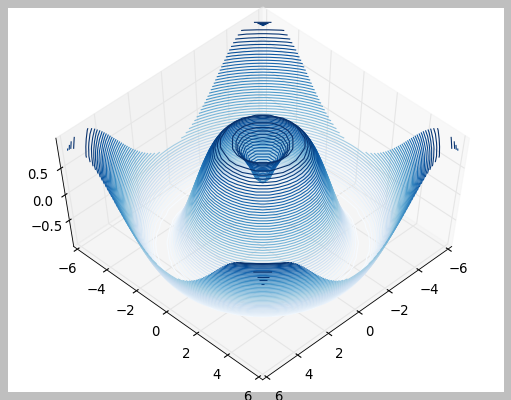

In [48]:
x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)

X, Y = np.meshgrid(x,y)

def func(x,y):
    return np.sin(np.sqrt(x**2 + y**2))
Z = func(X,Y)

ax = plt.axes(projection ='3d')
ax.contour3D(X,Y,Z,50,cmap='Blues')
ax.view_init(60,45) # 调整观察的视角和方位角
plt.show()

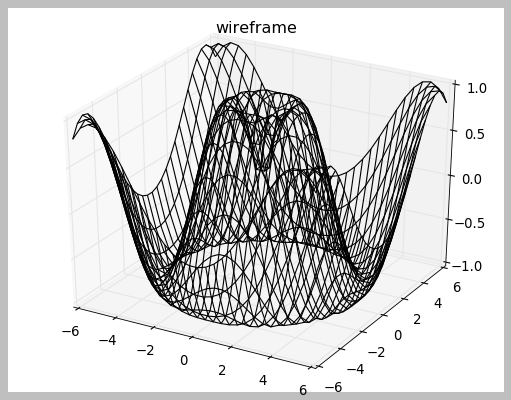

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');
plt.show()

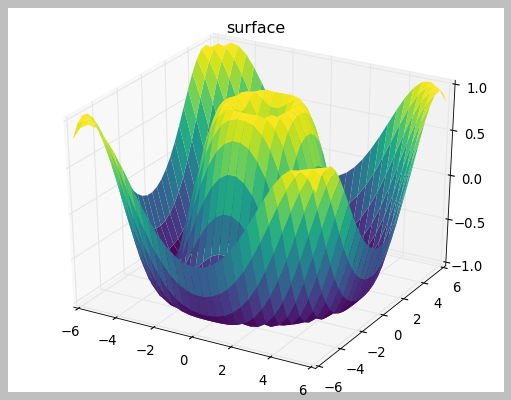

In [51]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.show()